In [35]:
from sklearn.datasets import load_iris
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.neighbors import DistanceMetric


In [ ]:
# Iris dataset이 어떤 구성으로 이루어져 있는지 알아봅니다.
# Data를 적절한 형식으로 불러올 dataloader를 구현해 봅니다(train, test set 구분)

iris = load_iris()
iris_data = iris.data
iris_label = iris.target

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)


x_train, x_test, y_train, y_test = train_test_split(iris_data,iris_label,test_size=0.2, random_state=42)

In [ ]:
# Sepal Length, Sepal Width, Petal Width (3 dimension) Visualize
markers = ['^', 's', 'o']
colors = ['r', 'g', 'b']

X = iris.data[:, :3]
y = iris.target

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(3):
    indices = np.where(y == i)
    ax.scatter(X[indices, 0], X[indices, 1], X[indices, 2], c=colors[i], marker=markers[i], label=iris.target_names[i])

ax.set_xlabel('Sepal_Length')
ax.set_ylabel('Sepal_Width')
ax.set_zlabel('Petal_Width')
plt.title('3D')
ax.legend()

plt.show()


In [ ]:
# Sepal Length, Sepal Width (2 dimension) Visualize
markers = ['^', 's', 'o']

for i in range(3) :
    x_axis = iris_df[iris_df['label']==i]['sepal length (cm)']
    y_axis = iris_df[iris_df['label']==i]['sepal width (cm)']
    plt.scatter(x_axis, y_axis, marker=markers[i], label=iris.target_names[i])

plt.legend()
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
plt.title('2D')

plt.show()


In [ ]:
# Normalization과 standardization(mean=0, std=1)을 각각 진행한 후 Visualize를 다시 해보고, 결과를 비교해봅니다.
# Sepal Length, Sepal Width, Petal Width (3 dimension) Visualize / Normalization

markers = ['^', 's', 'o']
colors = ['r', 'g', 'b']

# Min-Max 스케일링
X = iris.data[:, :3]
y = iris.target
# scaler = MinMaxScaler()
# X_Norm3 = scaler.fit_transform(X)
X_Norm3 = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(3):
    indices = np.where(y == i)
    ax.scatter(X_Norm3[indices, 0], X_Norm3[indices, 1], X_Norm3[indices, 2], c=colors[i], marker=markers[i], label=iris.target_names[i])

ax.set_xlabel('Sepal_Length')
ax.set_ylabel('Sepal_Width')
ax.set_zlabel('Petal_Width')
plt.title('3D / Normalization')
ax.legend()

plt.show()

In [ ]:
# Sepal Length, Sepal Width, Petal Width (3 dimension) Visualize / Standardization

markers = ['^', 's', 'o']
colors = ['r', 'g', 'b']

X = iris.data[:, :3]
y = iris.target
# scaler = StandardScaler()
# X_Stand3 = scaler.fit_transform(X)
X_Stand3 = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(3):
    indices = np.where(y == i)
    ax.scatter(X_Stand3[indices, 0], X_Stand3[indices, 1], X_Stand3[indices, 2], c=colors[i], marker=markers[i], label=iris.target_names[i])

ax.set_xlabel('Sepal_Length')
ax.set_ylabel('Sepal_Width')
ax.set_zlabel('Petal_Width')
plt.title('3D / Standardization')
ax.legend()

plt.show()

In [ ]:
# Sepal Length, Sepal Width (2 dimension) Visualize / Normalization

markers = ['^', 's', 'o']
colors = ['r', 'g', 'b']

X = iris.data[:, :2]
y = iris.target
# scaler = MinMaxScaler()
# X_Norm2 = scaler.fit_transform(X)
X_Norm2 = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

for i in range(3):
    indices = np.where(y == i)
    plt.scatter(X_Norm2[indices, 0], X_Norm2[indices, 1], c=colors[i], marker=markers[i], label=iris.target_names[i])
    

#plt.scatter(X_Norm2[:, 0], X_Norm2[:, 1], c=y)
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
plt.legend()
plt.title('2D / Normalization')

plt.show()


In [ ]:
# Sepal Length, Sepal Width (2 dimension) Visualize / Standardization

markers = ['^', 's', 'o']
colors = ['r', 'g', 'b']

X = iris.data[:, :2]
y = iris.target
# scaler = StandardScaler()
# X_Stand2 = scaler.fit_transform(X)
X_Stand2 = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

for i in range(3):
    indices = np.where(y == i)
    plt.scatter(X_Stand2[indices, 0], X_Stand2[indices, 1], c=colors[i], marker=markers[i], label=iris.target_names[i])
    

#plt.scatter(X_Norm2[:, 0], X_Norm2[:, 1], c=y)
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
plt.legend()
plt.title('2D / Standardization')

plt.show()

In [ ]:
# Iris dataset에 PCA를 적용하여 data를 N차원으로 축소시킨 후(N=2, 3), 
# N dimension space에 visualize 해봅니다. First Visualize와 비교해보고, PCA의 의미를 생각해봅니다
# N = 2

markers = ['^', 's', 'o']
colors = ['r', 'g', 'b']

X = iris.data
y = iris.target

pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X)

for i in range(3):
    indices = np.where(y == i)
    plt.scatter(X_pca2[indices, 0], X_pca2[indices, 1], c=colors[i], marker=markers[i], label=iris.target_names[i])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('Iris Dataset PCA / N=2')

plt.show()



In [ ]:
# N = 3

markers = ['^', 's', 'o']
colors = ['r', 'g', 'b']

X = iris.data
y = iris.target

pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(3):
    indices = np.where(y == i)
    ax.scatter(X_pca3[indices, 0], X_pca3[indices, 1], X_pca3[indices, 2], c=colors[i], label=iris.target_names[i])

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
ax.set_title('Iris Dataset PCA / N=3')

plt.show()


In [ ]:
# 아래 각 경우에 대해 K-NN classifier를 학습시킨 후, test set에 대한 accuracy를 측정하고 decision boundary를 visualize합니다.

# 1. Sepal Length, Sepal Width, Petal Width (3 dimension) 이용

# 데이터 로드
iris = load_iris()
X = iris.data[:, :3]
y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN 모델 훈련
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 테스트 세트에 대한 예측
accuracy = knn.score(X_test, y_test)
print("Test Set Accuracy:", accuracy)

# 결정 경계 시각화
h = 0.1  # mesh의 스텝 크기
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h),
                         np.arange(z_min, z_max, h))
mesh_data = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]

Z = knn.predict(mesh_data)
Z = Z.reshape(xx.shape)

# 클래스별 색상 지정
colors = ['red', 'green', 'blue']
cmap = ListedColormap(colors[:len(np.unique(y))])

# 결정 경계 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=cmap, edgecolors='k')
ax.contour3D(xx, yy, zz, Z, cmap='coolwarm', alpha=0.5)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Width')
plt.show()


In [ ]:
# 2. Sepal Length, Sepal Width (2 dimension) 이용

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data[:, :2]  # Sepal Length, Sepal Width
y = iris.target

# Train set과 Test set으로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN 모델 학습
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Test set에 대한 예측 결과 확인
accuracy = knn.score(X_test, y_test)
print("Test Set Accuracy:", accuracy)

# Decision Boundary 시각화
# 훈련 데이터 포인트의 경계선을 시각화하기 위해 메쉬그리드 생성
h = 0.02  # 메쉬그리드의 스텝 크기
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 메쉬그리드 상의 모든 점에 대해 예측을 수행하여 결과를 Z에 저장
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 훈련 데이터와 경계선을 그래프로 그리기
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('2D KNN Decision Boundary')
plt.show()



Test Set Accuracy: 0.9666666666666667


TypeError: Input z must be 2D, not 3D

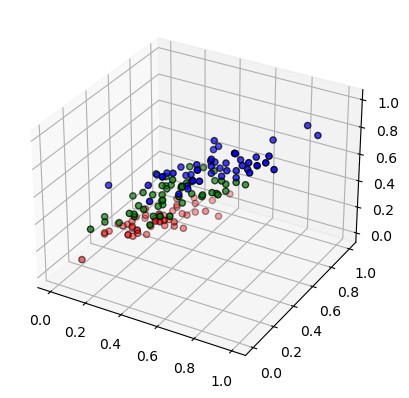

In [53]:
# 3. 위 두 경우에 대해 normalization 및 standardization을 진행한 후 수행
# Three dimension case / Normalization

# 데이터 로드
iris = load_iris()
X = iris.data[:, :3]
y = iris.target

X_normal = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.2, random_state=42)

# KNN 모델 훈련
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 테스트 세트에 대한 예측
accuracy = knn.score(X_test, y_test)
print("Test Set Accuracy:", accuracy)

# 결정 경계 시각화
h = 0.1  # mesh의 스텝 크기
x_min, x_max = X_normal[:, 0].min() - 1, X_normal[:, 0].max() + 1
y_min, y_max = X_normal[:, 1].min() - 1, X_normal[:, 1].max() + 1
z_min, z_max = X_normal[:, 2].min() - 1, X_normal[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h),
                         np.arange(z_min, z_max, h))
mesh_data = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]

Z = knn.predict(mesh_data)
Z = Z.reshape(xx.shape)

# 클래스별 색상 지정
colors = ['red', 'green', 'blue']
cmap = ListedColormap(colors[:len(np.unique(y))])

# 결정 경계 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_normal[:, 0], X_normal[:, 1], X_normal[:, 2], c=y, cmap=cmap, edgecolors='k')
ax.contour3D(xx, yy, zz, Z, cmap='coolwarm', alpha=0.5)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Width')
plt.show()

Test Set Accuracy: 0.9333333333333333


TypeError: Input z must be 2D, not 3D

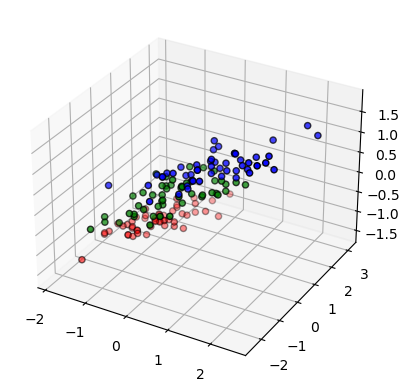

In [54]:
# Three dimension case / Standardization

# 데이터 로드
iris = load_iris()
X = iris.data[:, :3]
y = iris.target

X_Standa = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_Standa, y, test_size=0.2, random_state=42)

# KNN 모델 훈련
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 테스트 세트에 대한 예측
accuracy = knn.score(X_test, y_test)
print("Test Set Accuracy:", accuracy)

# 결정 경계 시각화
h = 0.1  # mesh의 스텝 크기
x_min, x_max = X_Standa[:, 0].min() - 1, X_Standa[:, 0].max() + 1
y_min, y_max = X_Standa[:, 1].min() - 1, X_Standa[:, 1].max() + 1
z_min, z_max = X_Standa[:, 2].min() - 1, X_Standa[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h),
                         np.arange(z_min, z_max, h))
mesh_data = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]

Z = knn.predict(mesh_data)
Z = Z.reshape(xx.shape)

# 클래스별 색상 지정
colors = ['red', 'green', 'blue']
cmap = ListedColormap(colors[:len(np.unique(y))])

# 결정 경계 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_Standa[:, 0], X_Standa[:, 1], X_Standa[:, 2], c=y, cmap=cmap, edgecolors='k')
ax.contour3D(xx, yy, zz, cmap='coolwarm', alpha=0.5)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Width')
plt.show()

Test Set Accuracy: 0.8333333333333334


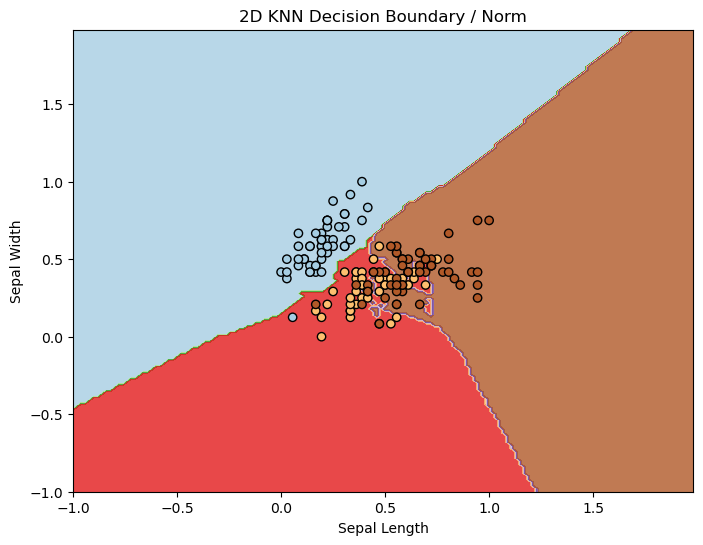

In [26]:
# Two dimension case / Normalization

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data[:, :2]  # Sepal Length, Sepal Width
y = iris.target

X_normal = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

# Train set과 Test set으로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.2, random_state=42)

# KNN 모델 학습
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Test set에 대한 예측 결과 확인
accuracy = knn.score(X_test, y_test)
print("Test Set Accuracy:", accuracy)

# Decision Boundary 시각화
# 훈련 데이터 포인트의 경계선을 시각화하기 위해 메쉬그리드 생성
h = 0.02  # 메쉬그리드의 스텝 크기
x_min, x_max = X_normal[:, 0].min() - 1, X_normal[:, 0].max() + 1
y_min, y_max = X_normal[:, 1].min() - 1, X_normal[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 메쉬그리드 상의 모든 점에 대해 예측을 수행하여 결과를 Z에 저장
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 훈련 데이터와 경계선을 그래프로 그리기
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_normal[:, 0], X_normal[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('2D KNN Decision Boundary / Norm')
plt.show()


Test Set Accuracy: 0.7666666666666667


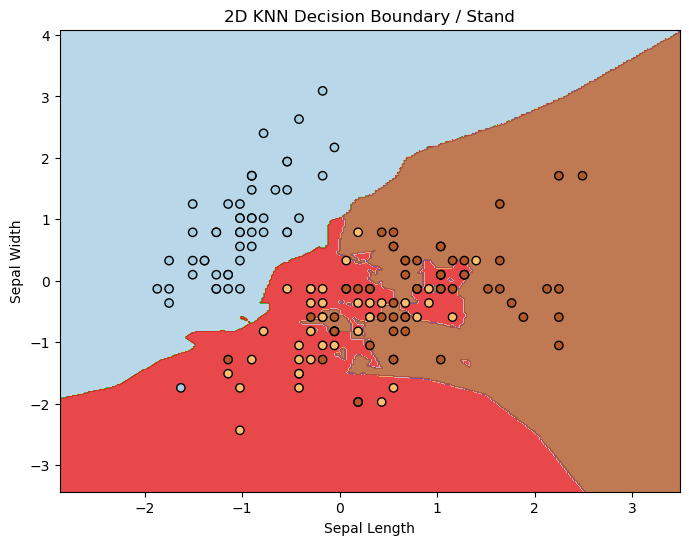

In [40]:
# Two dimension case / Standardization

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data[:, :2]  # Sepal Length, Sepal Width
y = iris.target

X_Standa = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Train set과 Test set으로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_Standa, y, test_size=0.2, random_state=42)

# KNN 모델 학습
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Test set에 대한 예측 결과 확인
accuracy = knn.score(X_test, y_test)
print("Test Set Accuracy:", accuracy)

# Decision Boundary 시각화
# 훈련 데이터 포인트의 경계선을 시각화하기 위해 메쉬그리드 생성
h = 0.02  # 메쉬그리드의 스텝 크기
x_min, x_max = X_Standa[:, 0].min() - 1, X_Standa[:, 0].max() + 1
y_min, y_max = X_Standa[:, 1].min() - 1, X_Standa[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 메쉬그리드 상의 모든 점에 대해 예측을 수행하여 결과를 Z에 저장
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 훈련 데이터와 경계선을 그래프로 그리기
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_Standa[:, 0], X_Standa[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('2D KNN Decision Boundary / Stand')
plt.show()

Test Set Accuracy: 1.0


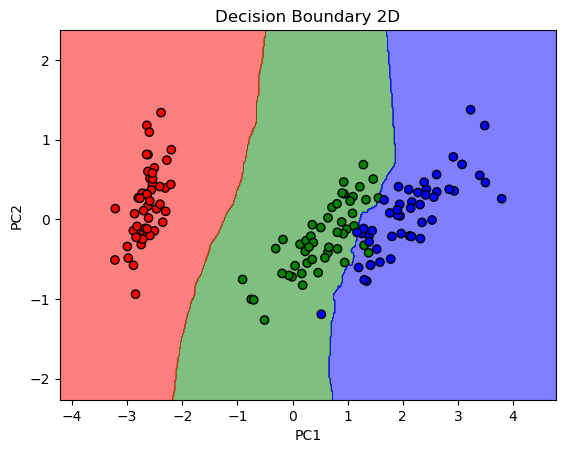

In [41]:
# 4. N dimension(N=2, 3)으로 reduction한 후 수행
# N = 2

iris = load_iris()
X = iris.data
y = iris.target

# PCA를 사용하여 2차원으로 데이터 축소
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# KNN 모델 훈련
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Test set에 대한 예측 결과 확인
accuracy = knn.score(X_test, y_test)
print("Test Set Accuracy:", accuracy)

# 결정 경계 시각화
h = 0.02  # mesh의 스텝 크기
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
mesh_data = np.c_[xx.ravel(), yy.ravel()]

Z = knn.predict(mesh_data)
Z = Z.reshape(xx.shape)

# 클래스별 색상 지정
colors = ['red', 'green', 'blue']
cmap = ListedColormap(colors[:len(np.unique(y))])

# 결정 경계 시각화
plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=cmap, edgecolors='k')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Decision Boundary 2D')

plt.show()


Test Set Accuracy: 1.0


TypeError: Input z must be 2D, not 3D

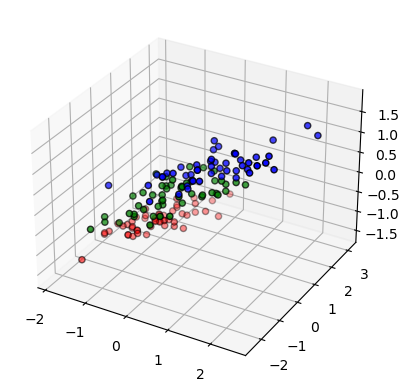

In [47]:
# N = 3

iris = load_iris()
X = iris.data
y = iris.target

# PCA를 사용하여 2차원으로 데이터 축소
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# KNN 모델 훈련
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Test set에 대한 예측 결과 확인
accuracy = knn.score(X_test, y_test)
print("Test Set Accuracy:", accuracy)

# 결정 경계 시각화
h = 0.1  # mesh의 스텝 크기
x_min, x_max = X_Standa[:, 0].min() - 1, X_Standa[:, 0].max() + 1
y_min, y_max = X_Standa[:, 1].min() - 1, X_Standa[:, 1].max() + 1
z_min, z_max = X_Standa[:, 2].min() - 1, X_Standa[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h),
                         np.arange(z_min, z_max, h))
mesh_data = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]

Z = knn.predict(mesh_data)
Z = Z.reshape(xx.shape)

# 클래스별 색상 지정
colors = ['red', 'green', 'blue']
cmap = ListedColormap(colors[:len(np.unique(y))])

# 결정 경계 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_Standa[:, 0], X_Standa[:, 1], X_Standa[:, 2], c=y, cmap=cmap, edgecolors='k')
ax.contour3D(xx, yy, zz, Z, cmap='coolwarm', alpha=0.5)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Width')
plt.show()


Test Set Accuracy: 1.0


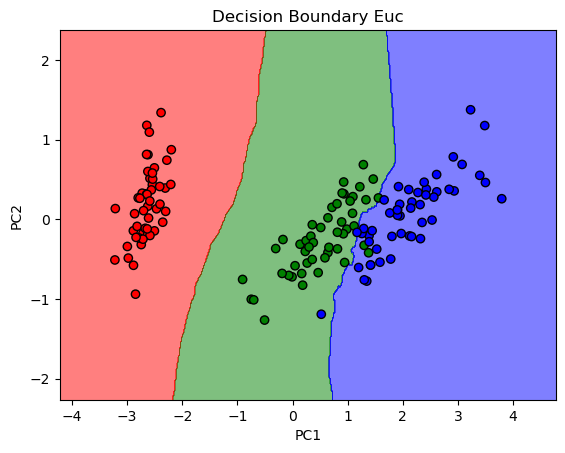

In [42]:
# 5. 위 4의 각각의 경우에서 Euclidean distance, Mahalanobis distance를 적용하여 수행한 후 비교
# N = 2 / Euclidean

iris = load_iris()
X = iris.data
y = iris.target

# PCA를 사용하여 2차원으로 데이터 축소
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# KNN 모델 훈련
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

# Test set에 대한 예측 결과 확인
accuracy = knn.score(X_test, y_test)
print("Test Set Accuracy:", accuracy)

# 결정 경계 시각화
h = 0.02  # mesh의 스텝 크기
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
mesh_data = np.c_[xx.ravel(), yy.ravel()]

Z = knn.predict(mesh_data)
Z = Z.reshape(xx.shape)

# 클래스별 색상 지정
colors = ['red', 'green', 'blue']
cmap = ListedColormap(colors[:len(np.unique(y))])

# 결정 경계 시각화
plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=cmap, edgecolors='k')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Decision Boundary Euc')

plt.show()

In [31]:
# N = 3 / Euclidean

iris = load_iris()
X = iris.data
y = iris.target

# PCA를 사용하여 3차원으로 데이터 축소
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# KNN 모델 훈련
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

# Test set에 대한 예측 결과 확인
accuracy = knn.score(X_test, y_test)
print("Test Set Accuracy:", accuracy)

# 결정 경계 시각화
h = 0.1  # mesh의 스텝 크기
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
z_min, z_max = X_reduced[:, 2].min() - 1, X_reduced[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h),
                     np.arange(z_min, z_max, h))
mesh_data = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]

Z = knn.predict(mesh_data)
Z = Z.reshape(xx.shape)

# 클래스별 색상 지정
colors = ['red', 'green', 'blue']
cmap = ListedColormap(colors[:len(np.unique(y))])

# 결정 경계 시각화
plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, cmap=cmap, edgecolors='k')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Decision Boundary')

plt.show()

Test Set Accuracy: 1.0


KeyboardInterrupt: 

In [39]:
# N = 2 / Mahalanobis

class MahalanobisDistanceMetric(DistanceMetric):
    def __init__(self, VI):
        self.VI = VI

    def pairwise(self, X, Y=None):
        if Y is None:
            Y = X
        return np.sqrt(np.sum(np.dot(X - Y, self.VI) * (X - Y), axis=1))

iris = load_iris()
X = iris.data
y = iris.target

# PCA를 사용하여 2차원으로 데이터 축소
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# 공분산 행렬 계산
covariance_matrix = np.cov(X_train.T)

# 공분산 행렬의 역행렬 계산
inv_covariance_matrix = np.linalg.inv(covariance_matrix)

# Mahalanobis 거리 메트릭 정의
mahalanobis_metric = MahalanobisDistanceMetric(inv_covariance_matrix)

# KNN 모델 훈련
knn = KNeighborsClassifier(metric=mahalanobis_metric, n_neighbors=5)
knn.fit(X_train, y_train)

# KNN 모델 훈련
knn = KNeighborsClassifier(metric='mahalanobis', n_neighbors=5)
knn.fit(X_train, y_train)

# Test set에 대한 예측 결과 확인
accuracy = knn.score(X_test, y_test)
print("Test Set Accuracy:", accuracy)

# 결정 경계 시각화
h = 0.02  # mesh의 스텝 크기
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
mesh_data = np.c_[xx.ravel(), yy.ravel()]

Z = knn.predict(mesh_data)
Z = Z.reshape(xx.shape)

# 클래스별 색상 지정
colors = ['red', 'green', 'blue']
cmap = ListedColormap(colors[:len(np.unique(y))])

# 결정 경계 시각화
plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=cmap, edgecolors='k')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Decision Boundary')

plt.show()

InvalidParameterError: The 'metric' parameter of KNeighborsClassifier must be a str among {'cosine', 'yule', 'canberra', 'correlation', 'nan_euclidean', 'cityblock', 'haversine', 'seuclidean', 'mahalanobis', 'precomputed', 'infinity', 'wminkowski', 'hamming', 'sokalsneath', 'sqeuclidean', 'p', 'rogerstanimoto', 'matching', 'jaccard', 'chebyshev', 'l1', 'euclidean', 'sokalmichener', 'russellrao', 'manhattan', 'braycurtis', 'dice', 'l2', 'pyfunc', 'minkowski', 'kulsinski'} or a callable. Got <__main__.MahalanobisDistanceMetric object at 0x000001268078C440> instead.

In [ ]:
# N = 3 / Mahalanobis


